# Introduction

This project is titled **“A Python-Based Analysis of Academic Performance Among Students Admitted Below and Above 18 Years of Age.”** It was motivated by a 2024 proposal from the Nigerian federal government, which suggested that students younger than 18 should not be admitted into tertiary institutions. The reason given was that such students might lack the maturity needed to handle academic and social responsibilities at that level.

To explore this claim, this analysis focuses on how **age at admission** influences academic performance. In particular, it compares the performance of students **under 18** with those **aged 18 and above** using data from **Fountain University, Osogbo**.

The dataset was sourced from the school’s academic records and, after cleaning, contains **1,401 student entries** and **6 key columns** (*7 after creating age groups*).

The main goal is to uncover whether **age plays a significant role** in students' academic success, measured by **CGPA** and **class of degree**.


In [48]:
# Import core data manipulation libraries
import pandas as pd     # For handling datasets and dataframes
from pandas.api.types import CategoricalDtype
import numpy as np      # For numerical operations

# Import Python's built-in libraries for randomness and OS-level operations
import random           # For generating random numbers
import os               # For interacting with the operating system (file paths)

# Import visualization libraries
import matplotlib.pyplot as plt      # For basic plotting
from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = 10, 8   # Set default figure size for plots

import seaborn as sns                # For advanced and attractive data visualizations

# Suppress future warnings to keep notebook output clean
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Data Loading & Setup

We begin by importing essential Python libraries for data analysis and visualization. This includes:
- `pandas` and `numpy` for data handling and numeric operations.
- `matplotlib` and `seaborn` for plotting.
- Standard libraries like `os` and `random` for miscellaneous tasks.
- Warning suppression is also enabled to keep the output clean.

### Loading First Dataset

The first dataset, `graduation_records_2010_11_to_2023_24.xlsx`, contains graduation records of students including:
- Names, Departments, and Programs
- Class of Degree
- Graduation Year
- Matric Number
- Date of Birth (DOB)
- State and Local Government of Origin

We check the dataset’s dimensions and preview its first few rows to understand its structure. It contains 3,208 records and 18 columns, although some of these columns (e.g., `Unnamed: 0`, `Unnamed: 9`, etc.) are likely redundant or artifacts from Excel formatting.


In [49]:
# Load the first dataset (graduation records) from an Excel file
df1 = pd.read_excel("raw_data/graduation_records_2010_11_to_2023_24.xlsx")

# Display the shape of the dataset: (rows, columns)
print(df1.shape)

# Preview the first five rows to understand the structure and contents
df1.head()

(3208, 18)


,Unnamed: 0,S/N,NAME OF GRADUANDS,DEPARTMENT,COURSE OF STUDY,CLASS OF DEGREE,GRADUATION YEAR,MATRIC NO,DOB,Unnamed: 9,STATE OF ORIGIN,LGA,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,1,1,ABIDOYE Mobolaji Kafayat,Accounting and Finance,Accounting,First Class,2010/2011,MAS/07006,1991-04-26 00:00:00,NaN,Oyo,Ido,2010/2011,MAS/07006,NaN,NaN,NaN,NaN
1,2,2,ADELEYE Nofisat Adunola,Accounting and Finance,Accounting,Second Class Honours (Upper Division),2010/2011,MAS/07019,1990-02-19 00:00:00,NaN,Ogun,Ijebu North,2010/2011,MAS/07019,NaN,NaN,NaN,NaN
2,3,3,AJAPE Quadri Kayode,Accounting and Finance,Accounting,Second Class Honours (Upper Division),2010/2011,MAS/08018,1989-04-25 00:00:00,NaN,Ondo,Akoko North,2010/2011,MAS/08018,NaN,NaN,NaN,NaN
3,4,4,ALARAPE Rukayat Olabisi,Accounting and Finance,Accounting,Second Class Honours (Upper Division),2010/2011,MAS/07043,1990-03-23 00:00:00,NaN,Oyo,Ibadan Central,2010/2011,MAS/07043,NaN,NaN,NaN,NaN
4,5,5,AKEEB Ayobami Haolat,Accounting and Finance,Accounting,Second Class Honours (Upper Division),2010/2011,MAS/07034,1991-08-01 00:00:00,NaN,Osun,Iwo,2010/2011,MAS/07034,NaN,NaN,NaN,NaN


### Cleaning the First Dataset

Several columns in the original dataset are either empty, duplicated, or irrelevant for this analysis (e.g., serial numbers, department, and repeated matric/year info). These columns are dropped to streamline the dataset.

After this operation, the dataset is reduced to 7 meaningful columns:
- Name of Graduands
- Course of Study
- Class of Degree
- Graduation Year
- Matric Number
- Date of Birth (DOB)
- State of Origin


In [50]:
# Define a list of columns that are not useful for analysis
irrelevant_features = ['Unnamed: 0', 'S/N', 'DEPARTMENT',
                    'Unnamed: 9', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
                    'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'LGA']

# Drop only the columns from the list that actually exist in the DataFrame
df1.drop(columns=[col for col in irrelevant_features if col in df1.columns], inplace=True)

# Print the new shape of the dataset to confirm column removal
print(df1.shape)

# Preview the cleaned dataset
df1.head()


(3208, 7)


,NAME OF GRADUANDS,COURSE OF STUDY,CLASS OF DEGREE,GRADUATION YEAR,MATRIC NO,DOB,STATE OF ORIGIN
0,ABIDOYE Mobolaji Kafayat,Accounting,First Class,2010/2011,MAS/07006,1991-04-26 00:00:00,Oyo
1,ADELEYE Nofisat Adunola,Accounting,Second Class Honours (Upper Division),2010/2011,MAS/07019,1990-02-19 00:00:00,Ogun
2,AJAPE Quadri Kayode,Accounting,Second Class Honours (Upper Division),2010/2011,MAS/08018,1989-04-25 00:00:00,Ondo
3,ALARAPE Rukayat Olabisi,Accounting,Second Class Honours (Upper Division),2010/2011,MAS/07043,1990-03-23 00:00:00,Oyo
4,AKEEB Ayobami Haolat,Accounting,Second Class Honours (Upper Division),2010/2011,MAS/07034,1991-08-01 00:00:00,Osun


### Standardizing Column Names

To make the dataset easier to reference programmatically, we rename the columns using all uppercase letters with underscores instead of spaces. This is a common data cleaning practice for better readability and fewer syntax issues during coding.


In [51]:
# Rename columns to cleaner, more code-friendly versions
df1 = df1.rename(columns={
    "NAME OF GRADUANDS": "NAME",
    "COURSE OF STUDY": "COURSE_OF_STUDY",
    "CLASS OF DEGREE": "CLASS_OF_DEGREE",
    "GRADUATION YEAR": "GRADUATION_YEAR",
    "MATRIC NO": "MATRIC_NO",
    "STATE OF ORIGIN": "STATE_OF_ORIGIN"
})

# Display the updated DataFrame to confirm column renaming
df1.head()


,NAME,COURSE_OF_STUDY,CLASS_OF_DEGREE,GRADUATION_YEAR,MATRIC_NO,DOB,STATE_OF_ORIGIN
0,ABIDOYE Mobolaji Kafayat,Accounting,First Class,2010/2011,MAS/07006,1991-04-26 00:00:00,Oyo
1,ADELEYE Nofisat Adunola,Accounting,Second Class Honours (Upper Division),2010/2011,MAS/07019,1990-02-19 00:00:00,Ogun
2,AJAPE Quadri Kayode,Accounting,Second Class Honours (Upper Division),2010/2011,MAS/08018,1989-04-25 00:00:00,Ondo
3,ALARAPE Rukayat Olabisi,Accounting,Second Class Honours (Upper Division),2010/2011,MAS/07043,1990-03-23 00:00:00,Oyo
4,AKEEB Ayobami Haolat,Accounting,Second Class Honours (Upper Division),2010/2011,MAS/07034,1991-08-01 00:00:00,Osun


### Graduation Year Cleaning and Filtering

The graduation year was originally in the format "2013/2014". To simplify analysis, we extract just the final year and convert it to an integer. We then filter the dataset to include only students who graduated from 2014 onward, in line with the scope of this project.


In [52]:
# Extract the actual graduation year from the "2013/2014" format by taking the second part
df1['GRADUATION_YEAR'] = df1['GRADUATION_YEAR'].str.split('/').str[-1]

# Convert the extracted year string into an integer type
df1['GRADUATION_YEAR'] = pd.to_numeric(df1['GRADUATION_YEAR'])

# Keep only students who graduated in 2014 or later
df1 = df1.query('GRADUATION_YEAR >= 2014')

# Print the shape to confirm the number of remaining records
print(df1.shape)

# Preview the filtered dataset
df1.head()

(2771, 7)


,NAME,COURSE_OF_STUDY,CLASS_OF_DEGREE,GRADUATION_YEAR,MATRIC_NO,DOB,STATE_OF_ORIGIN
437,ALI-BALOGUN Munirudeen Adeyemi,Accounting,First Class,2014,MAS/10030,1994-01-31 00:00:00,Oyo
438,AZEEZ Rukayat Olajumoke,Accounting,First Class,2014,MAS/10041,1992-05-20 00:00:00,Oyo
439,AKINTOLA Fatima Moji,Accounting,Second Class (Upper Division),2014,MAS/10023,1993-08-01 00:00:00,Ogun
440,AGBAJE Aminat Temitope,Accounting,Second Class (Upper Division),2014,MAS/10015,1994-08-19 00:00:00,Lagos
441,ALAWODE Zainab Olayinka,Accounting,Second Class (Upper Division),2014,MAS/10029,1994-03-27 00:00:00,Kwara


### Graduation Year Range Confirmation

To confirm the filtering worked as intended, we list the unique graduation years remaining in the dataset. As expected, the dataset now includes students who graduated between 2014 and 2024.

In [53]:
# Display a sorted list of unique graduation years available in the dataset
sorted(df1['GRADUATION_YEAR'].value_counts().index.tolist())

[2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]

### Checking for Course Name Inconsistencies

We inspect all unique values in the `COURSE_OF_STUDY` column to detect inconsistencies. The list shows variations like:
- Typos: "Business Admininstration", "Businesss Administration"
- Inconsistent formats: "Banking & Finance" vs. "Banking and Finance",
  "MicroBiology" vs. "Microbiology"
- Extra whitespace or trailing spaces

These inconsistencies need to be cleaned to ensure accurate grouping and analysis later on.


In [54]:
# Display a sorted list of unique course names to check for inconsistencies or duplicates
sorted(df1['COURSE_OF_STUDY'].value_counts().index.tolist())

['Accounting',
 'Banking & Finance',
 'Banking and Finance',
 'Biochemistry & Nutrition',
 'Biochemistry and Nutrition',
 'Business Admininstration',
 'Business Administration',
 'Business Adminsitration',
 'Businesss Administration',
 'Computer Science',
 'Economics',
 'Environmental Health Science',
 'Industrial & Environmental Chemistry',
 'Industrial and Environmental chemistry ',
 'Mass Communication',
 'Medical Laboratory Sciences',
 'MicroBiology',
 'Microbiology',
 'Nursing Sciences',
 'Physics with Electronics',
 'Pol.Sci. & Pub. Admin',
 'Pol.Sci.& Pub. Admin',
 'Political Science',
 'Public Health ',
 'Sociology']

### Course Name Cleaning and Standardization

To ensure consistency in course names, we:
- Replace incorrect and inconsistent values using a predefined dictionary.
- Standardize formatting by stripping whitespace, replacing multiple spaces with single ones, and applying title case.

After cleaning, the `COURSE_OF_STUDY` column now contains 16 consistent course names — ready for analysis.

In [55]:
# Define a dictionary mapping incorrect course names to their corrected versions
replacements = {
    'Banking & Finance': 'Banking and Finance',
    'Biochemistry & Nutrition': 'Biochemistry and Nutrition',
    'Businesss': 'Business',
    'Admininstration': 'Administration',
    'Adminsitration': 'Administration',
    'Industrial & Environmental Chemistry': 'Industrial and Environmental Chemistry',
    'Industrial and Environmental chemistry ': 'Industrial and Environmental Chemistry',
    'MicroBiology': 'Microbiology',
    'Pol.Sci. & Pub. Admin': 'Political Science',
    'Pol.Sci.& Pub. Admin': 'Political Science'
}

# Apply the replacements using string replacement
for wrong, correct in replacements.items():
    df1['COURSE_OF_STUDY'] = df1['COURSE_OF_STUDY'].str.replace(wrong, correct, regex=True)

# Final formatting: strip whitespace, reduce multiple spaces to one, and title-case all names
df1['COURSE_OF_STUDY'] = (
    df1['COURSE_OF_STUDY']
    .str.strip()
    .str.replace(r'\s+', ' ', regex=True)
    .str.title()
)

# Check final list of unique course names
sorted(df1['COURSE_OF_STUDY'].value_counts().index.tolist())

['Accounting',
 'Banking And Finance',
 'Biochemistry And Nutrition',
 'Business Administration',
 'Computer Science',
 'Economics',
 'Environmental Health Science',
 'Industrial And Environmental Chemistry',
 'Mass Communication',
 'Medical Laboratory Sciences',
 'Microbiology',
 'Nursing Sciences',
 'Physics With Electronics',
 'Political Science',
 'Public Health',
 'Sociology']

### Checking for Class of Degree Inconsistencies

We inspect the unique values in the `CLASS_OF_DEGREE` column to identify formatting inconsistencies. The list includes:
- Variants of the same class (e.g., "Second Class (Upper Division)" vs. "Second Class Honours (Upper Division)")
- Diploma-style classifications (e.g., "Pass with Credit", "Pass with Distinction")

These inconsistencies will be standardized next to ensure consistency across the dataset.

In [56]:
# Display a sorted list of unique degree classifications to check for inconsistencies
sorted(df1['CLASS_OF_DEGREE'].value_counts().index.tolist())

['First Class',
 'First Class Honours',
 'Pass',
 'Pass with Credit',
 'Pass with Distinction',
 'Second Class (Lower Division)',
 'Second Class (Upper Division)',
 'Second Class Honours (Lower Division)',
 'Second Class Honours (Upper Division)',
 'Third Class',
 'Third Class Honours']

### Cleaning Class of Degree Labels

We standardize the `CLASS_OF_DEGREE` column by:
- Merging similar categories (e.g., "Second Class Honours (Upper Division)" → "Second Class Upper")
- Unifying different pass distinctions into a single "Pass" category
- Simplifying naming conventions

The final set of degree classifications includes:
- First Class
- Second Class Upper
- Second Class Lower
- Third Class
- Pass

In [57]:
# Define a dictionary to standardize inconsistent degree classification labels
replacements = {
    'First Class Honours': 'First Class',
    'Pass with Credit': 'Pass',
    'Pass with Distinction': 'Pass',
    'Second Class (Lower Division)': 'Second Class Lower',
    'Second Class (Upper Division)': 'Second Class Upper',
    'Second Class Honours (Lower Division)': 'Second Class Lower',
    'Second Class Honours (Upper Division)': 'Second Class Upper',
    'Third Class Honours': 'Third Class'
}

# Apply the replacements to the CLASS_OF_DEGREE column
for wrong, correct in replacements.items():
    df1['CLASS_OF_DEGREE'] = df1['CLASS_OF_DEGREE'].str.replace(wrong, correct, regex=False)

# Check the final list of unique, cleaned classifications
sorted(df1['CLASS_OF_DEGREE'].value_counts().index.tolist())

['First Class',
 'Pass',
 'Second Class Lower',
 'Second Class Upper',
 'Third Class']

### Cleaning and Reviewing States of Origin

We clean the `STATE_OF_ORIGIN` column to ensure uniform formatting by removing extra spaces and applying title casing.

Then, we print the unique values in groups of five to visually inspect for typos or inconsistent spellings. This helps identify issues like:
- "Osu" instead of "Osun"
- "River" instead of "Rivers"
- "0Sun" or other data entry errors

The goal is to correct these before using the column in analysis or visualizations.

In [58]:
# Clean the STATE_OF_ORIGIN column by:
# - Stripping leading/trailing whitespace
# - Replacing multiple spaces with single spaces
# - Applying title case formatting
df1['STATE_OF_ORIGIN'] = (
    df1['STATE_OF_ORIGIN']
    .str.strip()
    .str.replace(r'\s+', ' ', regex=True)
    .str.title()
)

# Get a sorted list of unique state names
vals = sorted(df1['STATE_OF_ORIGIN'].value_counts().index.tolist())

# Define how many states to print per line for better readability
n = 5

# Print the state names in chunks of 5 per line to spot anomalies easily
for i in range(0, len(vals), n):
    print(','.join(vals[i:i+n]))

,0Sun,Abuja,Akwa Ibon,Bauchi
Benin,Benue,Delta,Edo,Ekiti
Fct,Gombe,Imo,Kaduna,Kano
Katsina,Kebbi,Kogi,Kwara,Lagos
Niger,Ogun,Ondo,Osu,Osun
Oyo,Plateau,River,Rivers,Taraba
Yobe


### Fixing State Name Errors

We finalize the cleanup of `STATE_OF_ORIGIN` by:
- Replacing known typos and incorrect labels using regex (e.g., "0Sun" → "Osun", "River" → "Rivers").
- Removing entries that are blank or contain only whitespace.
- Reviewing the final list of states in chunks for visual confirmation.

The column is now ready for geographic or demographic analysis.

In [59]:
# Define known incorrect or inconsistent state names and their correct forms
replacements = {
    '0Sun': 'Osun',
    'Fct': 'Abuja',
    r'\bOsu\b': 'Osun',        # Replace 'Osu' only when it's a full word
    r'\bRiver\b': 'Rivers'     # Replace 'River' only when it's a full word
}

# Remove rows where STATE_OF_ORIGIN is empty or just whitespace
df1 = df1[df1['STATE_OF_ORIGIN'].str.strip() != '']

# Apply all replacements using regular expressions
for wrong, correct in replacements.items():
    df1['STATE_OF_ORIGIN'] = df1['STATE_OF_ORIGIN'].str.replace(wrong, correct, regex=True)

# Get and print sorted list of unique, cleaned states in chunks of 5 for easy review
vals = sorted(df1['STATE_OF_ORIGIN'].value_counts().index.tolist())
n = 5
for i in range(0, len(vals), n):
    print(','.join(vals[i:i+n]))

Abuja,Akwa Ibon,Bauchi,Benin,Benue
Delta,Edo,Ekiti,Gombe,Imo
Kaduna,Kano,Katsina,Kebbi,Kogi
Kwara,Lagos,Niger,Ogun,Ondo
Osun,Oyo,Plateau,Rivers,Taraba
Yobe


### Dataset Structure Overview

We inspect the structure of the cleaned dataset using `.info()` to confirm:
- The data types for each column
- The number of non-null entries (useful for spotting missing data)
- That only one column (`GRADUATION_YEAR`) is numeric so far

 **Observations**:
- `DOB` (Date of Birth) has a significant number of missing values (only 1,403 of 2,770).
- `STATE_OF_ORIGIN` also has missing values, though fewer.
- The `DOB` column is still an object type — we’ll need to convert it to a datetime format.

In [60]:
# Display the structure of the DataFrame
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2770 entries, 437 to 3207
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   NAME             2769 non-null   object
 1   COURSE_OF_STUDY  2770 non-null   object
 2   CLASS_OF_DEGREE  2770 non-null   object
 3   GRADUATION_YEAR  2770 non-null   int64 
 4   MATRIC_NO        2770 non-null   object
 5   DOB              1403 non-null   object
 6   STATE_OF_ORIGIN  1468 non-null   object
dtypes: int64(1), object(6)
memory usage: 173.1+ KB


### Converting Date of Birth to Year

To prepare for calculating age at admission, we:
- Convert the `DOB` column to `datetime` using `pd.to_datetime()`.
- Extract just the year component (e.g., 1995) to simplify later calculations.

After this step:
- The `DOB` column becomes numeric (type: float64 due to NaNs).
- We note that 1,395 students have valid birth years out of 2,770.

In [61]:
# Convert the DOB column to datetime format
# 'errors="coerce"' ensures invalid dates become NaT (missing)
df1['DOB'] = pd.to_datetime(df1['DOB'], errors='coerce', dayfirst=False)

# Extract only the birth year from the datetime column
df1['DOB'] = df1['DOB'].dt.year

# Check the structure of the DataFrame again after transformation
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2770 entries, 437 to 3207
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   NAME             2769 non-null   object 
 1   COURSE_OF_STUDY  2770 non-null   object 
 2   CLASS_OF_DEGREE  2770 non-null   object 
 3   GRADUATION_YEAR  2770 non-null   int64  
 4   MATRIC_NO        2770 non-null   object 
 5   DOB              1395 non-null   float64
 6   STATE_OF_ORIGIN  1468 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 173.1+ KB


### Reviewing Birth Year Range

After extracting birth years from `DOB`, we check the spread of values to:
- Identify the typical age range of students.
- Spot outliers or incorrect entries.

👀 **Observation**:
The years range from **1967 to 2012**. While most values are realistic, a few later birth years (like 2012) may need further review — possibly from data entry errors.

In [62]:
# Get a sorted list of unique birth years
vals = str(sorted(df1['DOB'].value_counts().index.tolist()))

# Print the years in chunks of 40 characters per line for easier readability
n = 40
for i in range(0, len(vals), n):
    print(''.join(vals[i:i+n]))

[1967.0, 1970.0, 1972.0, 1973.0, 1974.0,
 1975.0, 1976.0, 1977.0, 1978.0, 1979.0,
 1980.0, 1981.0, 1982.0, 1983.0, 1984.0,
 1985.0, 1986.0, 1987.0, 1988.0, 1989.0,
 1990.0, 1991.0, 1992.0, 1993.0, 1994.0,
 1995.0, 1996.0, 1997.0, 1998.0, 1999.0,
 2000.0, 2001.0, 2002.0, 2003.0, 2004.0,
 2005.0, 2012.0]


### Verifying Outlier: Birth Year 2012

We isolate the record with `DOB == 2012` to validate whether it's a genuine entry or an error.

 **Finding**:
The student is listed as graduating in **2016**, which would make them **4 years old** at the time — clearly a data entry error. We'll handle this in the next step.

In [63]:
# Filter and inspect rows where DOB is 2012 to verify data quality
the2012 = df1.query('DOB == 2012')
the2012

,NAME,COURSE_OF_STUDY,CLASS_OF_DEGREE,GRADUATION_YEAR,MATRIC_NO,DOB,STATE_OF_ORIGIN
824,FOLARIN Olalekan Yakub,Accounting,Second Class Lower,2016,MAS/12059,2012.0,Ogun


### Removing Unrealistic Birth Years

To clean up outliers, we remove entries with birth years later than 2005. This ensures the dataset only contains plausible age data.

 **Result**:
The birth years now range from **1967 to 2005**, which is appropriate for graduates between 2014 and 2024.

In [64]:
# Remove any rows where DOB is later than 2005 (to exclude unrealistic entries)
df1 = df1.query('DOB <= 2005')

# Check the updated list of birth years to confirm
vals = str(sorted(df1['DOB'].value_counts().index.tolist()))

# Print the values in chunks for readability
n = 40
for i in range(0, len(vals), n):
    print(''.join(vals[i:i+n]))

[1967.0, 1970.0, 1972.0, 1973.0, 1974.0,
 1975.0, 1976.0, 1977.0, 1978.0, 1979.0,
 1980.0, 1981.0, 1982.0, 1983.0, 1984.0,
 1985.0, 1986.0, 1987.0, 1988.0, 1989.0,
 1990.0, 1991.0, 1992.0, 1993.0, 1994.0,
 1995.0, 1996.0, 1997.0, 1998.0, 1999.0,
 2000.0, 2001.0, 2002.0, 2003.0, 2004.0,
 2005.0]


### Extracting First Name

We extract each student’s first name from the full `NAME` column using string splitting. This allows for simpler referencing and could be useful for gender inference or individual-level personalization.

After extraction, the original `NAME` column is dropped to reduce redundancy.

In [65]:
# Extract the first name (assumed to be the second word) from the full name
df1['FIRST_NAME'] = df1['NAME'].str.split().str[1].str.title()

# Drop the original NAME column since it's no longer needed
df1.drop(columns=['NAME'], inplace=True)

# Preview the updated dataset
df1.head()

,COURSE_OF_STUDY,CLASS_OF_DEGREE,GRADUATION_YEAR,MATRIC_NO,DOB,STATE_OF_ORIGIN,FIRST_NAME
437,Accounting,First Class,2014,MAS/10030,1994.0,Oyo,Munirudeen
438,Accounting,First Class,2014,MAS/10041,1992.0,Oyo,Rukayat
439,Accounting,Second Class Upper,2014,MAS/10023,1993.0,Ogun,Fatima
440,Accounting,Second Class Upper,2014,MAS/10015,1994.0,Lagos,Aminat
441,Accounting,Second Class Upper,2014,MAS/10029,1994.0,Kwara,Zainab


### Gender Assignment Based on First Names

To assign gender, we:
1. Check if a name-to-gender mapping file exists (`name_gender_mapping.xlsx`).
2. If it exists, we load it and map gender values to the dataset using a dictionary.
3. If it doesn’t exist, we extract unique first names and export them for manual tagging.

This approach balances automation with cultural/local knowledge, especially when no reliable gender prediction API is used.

In [66]:
file_path = "cleaned_dataset/name_gender_mapping.xlsx"

# Check if the name-to-gender mapping file already exists
if os.path.isfile(file_path):
    print("File already exists.")

    # Load the name-gender mapping file
    gender_map_df = pd.read_excel(file_path)

    # Convert it to a dictionary for fast lookup
    gender_dict = dict(zip(gender_map_df['FIRST_NAME'], gender_map_df['GENDER']))

    # Map gender to each row in the dataset using the dictionary
    df1['GENDER'] = df1['FIRST_NAME'].map(gender_dict)

    gender_file = True

else:
    # If the mapping file doesn't exist, extract unique first names
    unique_names = df1['FIRST_NAME'].dropna().unique()

    # Create a new Excel file with unique names for manual gender tagging
    pd.DataFrame({'FIRST_NAME': unique_names}).to_excel(file_path, index=False)

    gender_file = False

File already exists.


### Finalizing Gender Mapping (if not already done)

If gender information hasn’t been added yet, we:
- Reload the manually labeled name-gender file.
- Create a dictionary for mapping.
- Apply the gender labels to the dataset.

We confirm the mapping by sampling a few rows. The new `GENDER` column is now ready for use in further demographic analysis.

In [67]:
# If the gender mapping wasn't previously applied, do it now
if not gender_file:
    # Load the updated mapping file with manually tagged gender info
    gender_map_df = pd.read_excel('data/name_gender_mapping.xlsx')

    # Create a dictionary from first names to gender labels
    gender_dict = dict(zip(gender_map_df['FIRST_NAME'], gender_map_df['GENDER']))

    # Map gender info to the main dataset using first names
    df1['GENDER'] = df1['FIRST_NAME'].map(gender_dict)

# Preview a random sample of 5 rows to verify gender mapping
df1.sample(5)

,COURSE_OF_STUDY,CLASS_OF_DEGREE,GRADUATION_YEAR,MATRIC_NO,DOB,STATE_OF_ORIGIN,FIRST_NAME,GENDER
1958,Business Administration,Second Class Upper,2020,NAS/15475,1991.0,Kwara,Ridwan,M
3075,Computer Science,First Class,2024,NAS/16592,2004.0,Osun,Oluwadarasimi,M
1536,Computer Science,Second Class Upper,2018,NAS/15053,1989.0,Ogun,Adeyinka,M
2790,Mass Communication,Second Class Lower,2023,NAS/16307,2002.0,Osun,Ramat,F
2568,Political Science,Second Class Lower,2022,NAS/16085,1999.0,Kwara,Abdulhaleem,M


### Final Dataset Validation

We use `.info()` to verify that the dataset is clean and complete after all transformations. Out of 1,394 total entries:
- All columns except `STATE_OF_ORIGIN`, `FIRST_NAME`, and `GENDER` are fully populated.
- These small gaps can be handled with either imputation or removal based on analysis needs.

The dataset is now ready for further processing — including age calculation, feature engineering, and analysis.

In [68]:
# Inspect the current structure and completeness of the dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1394 entries, 437 to 3202
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   COURSE_OF_STUDY  1394 non-null   object 
 1   CLASS_OF_DEGREE  1394 non-null   object 
 2   GRADUATION_YEAR  1394 non-null   int64  
 3   MATRIC_NO        1394 non-null   object 
 4   DOB              1394 non-null   float64
 5   STATE_OF_ORIGIN  1389 non-null   object 
 6   FIRST_NAME       1393 non-null   object 
 7   GENDER           1393 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 98.0+ KB


### Final Cleanup: Removing Missing Values

To ensure all subsequent analysis runs smoothly, we:
- Drop any rows that still contain missing values.
- Confirm that all columns are now complete with `.info()`.

Only 7 records were dropped, leaving **1,388 fully clean and usable entries**.

In [69]:
# Print the total number of missing values before dropping them
print(f"Droping {df1.isna().sum().sum()} missing values")

# Drop any rows with missing values across the dataset
df1.dropna(inplace=True)

# Check the structure again to confirm that all values are now complete
df1.info()

Droping 7 missing values
<class 'pandas.core.frame.DataFrame'>
Index: 1388 entries, 437 to 3202
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   COURSE_OF_STUDY  1388 non-null   object 
 1   CLASS_OF_DEGREE  1388 non-null   object 
 2   GRADUATION_YEAR  1388 non-null   int64  
 3   MATRIC_NO        1388 non-null   object 
 4   DOB              1388 non-null   float64
 5   STATE_OF_ORIGIN  1388 non-null   object 
 6   FIRST_NAME       1388 non-null   object 
 7   GENDER           1388 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 97.6+ KB


In [70]:
df1.to_csv("cleaned_dataset/cleaned_graduation_records.csv", index=False)

## Loading the Second Dataset

The second dataset, `cgpa_records.xlsx`, contains final CGPA information for 327 students. Key columns include:
- Matric Number
- Student Name
- Academic Year
- Final CGPA

We'll clean and prepare this dataset before merging it with the first dataset.

In [71]:
# Load the second dataset containing CGPA records
df2 = pd.read_excel('raw_data/cgpa_records.xlsx')

# Display the shape of the dataset (rows, columns)
print(df2.shape)

# Preview the first five rows to understand its structure
df2.head()

(327, 4)


,YEAR,MATRIC NUMBER,NAME,FINAL CGPA
0,2014/2015,MAS/10002,ADEBAKIN ABIOLA RASHEED,1.53
1,NaN,MAS/10039,AWOGUN OLAJIDE IDRIS,2.27
2,NaN,MAS/11019,ADELANA ADEFULE GEORGE,2.05
3,NaN,MAS/11020,ADELEKE BASHEERAT OLAJUMOKE,1.89
4,NaN,MAS/11133,OLATUNJI SULIKHAT OLABISI,2.37


### Cleaning and Preparing the Second Dataset

We clean the second dataset by:
- Dropping irrelevant columns (`YEAR`, `NAME`)
- Renaming the remaining columns to align with the first dataset
- Ensuring that `FINAL_CGPA` is treated as a numeric column

In [72]:
# Drop irrelevant columns that won't be used for merging or analysis
useless_features = ['YEAR', 'NAME']
df2.drop(columns=[col for col in useless_features if col in df2.columns], inplace=True)

# Rename the remaining columns to match the format in the first dataset
df2 = df2.rename(columns={
    'MATRIC NUMBER': 'MATRIC_NO',
    'FINAL CGPA': 'FINAL_CGPA'
})

# Convert FINAL_CGPA to numeric in case there are any type inconsistencies
df2['FINAL_CGPA'] = pd.to_numeric(df2['FINAL_CGPA'])

# Preview the cleaned second dataset
df2.head()

,MATRIC_NO,FINAL_CGPA
0,MAS/10002,1.53
1,MAS/10039,2.27
2,MAS/11019,2.05
3,MAS/11020,1.89
4,MAS/11133,2.37


### Dataset Structure Check: CGPA Data

We inspect the second dataset with `.info()` to verify:
- It contains 327 rows and 2 columns.
- Two rows are missing; a `MATRIC_NO` and a `FINAL_CGPA`.
- `FINAL_CGPA` is correctly typed as float64.

In [73]:
# Check the structure and completeness of the second dataset
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327 entries, 0 to 326
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MATRIC_NO   326 non-null    object 
 1   FINAL_CGPA  326 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.2+ KB


### Final Cleanup of CGPA Data

We remove the 2 rows with missing values to ensure a fully complete dataset. After this step:
- The CGPA dataset contains **326 fully valid records**.
- It is ready to be merged with the cleaned first dataset using `MATRIC_NO` as the key.

In [74]:
# Print the number of missing values to be dropped
print(f"Droping {df2.isna().sum().sum()} missing values")

# Drop rows with any missing values
df2.dropna(inplace=True)

# Confirm the structure and completeness of the cleaned DataFrame
df2.info()

Droping 2 missing values
<class 'pandas.core.frame.DataFrame'>
Index: 326 entries, 0 to 326
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MATRIC_NO   326 non-null    object 
 1   FINAL_CGPA  326 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.6+ KB


In [75]:
df2.to_csv("cleaned_dataset/cleaned_cgpa_records.csv", index=False)

### Merging the Datasets

We merge the first dataset (student info) with the second dataset (CGPA records) using `MATRIC_NO` as the key.
Before merging, we standardize `MATRIC_NO` in both datasets by:
- Removing extra spaces
- Converting to uppercase

The merge is done with a **left join** to retain all student records from the first dataset, even if a CGPA is missing.

 **Result**:
- Final dataset: 1,401 records and 9 columns
- Some `FINAL_CGPA` values are missing, likely due to students not being included in the CGPA file.

In [76]:
# Standardize MATRIC_NO in both datasets by stripping spaces and converting to uppercase
df1['MATRIC_NO'] = df1['MATRIC_NO'].str.strip().str.upper()
df2['MATRIC_NO'] = df2['MATRIC_NO'].str.strip().str.upper()

# Merge the datasets on MATRIC_NO using a left join to keep all rows from df1
df = df1.merge(df2, on='MATRIC_NO', how='left')

# Check the shape of the merged dataset and preview the first few rows
print(df.shape)
df.head()

(1401, 9)


,COURSE_OF_STUDY,CLASS_OF_DEGREE,GRADUATION_YEAR,MATRIC_NO,DOB,STATE_OF_ORIGIN,FIRST_NAME,GENDER,FINAL_CGPA
0,Accounting,First Class,2014,MAS/10030,1994.0,Oyo,Munirudeen,M,NaN
1,Accounting,First Class,2014,MAS/10041,1992.0,Oyo,Rukayat,F,NaN
2,Accounting,Second Class Upper,2014,MAS/10023,1993.0,Ogun,Fatima,F,NaN
3,Accounting,Second Class Upper,2014,MAS/10015,1994.0,Lagos,Aminat,F,NaN
4,Accounting,Second Class Upper,2014,MAS/10029,1994.0,Kwara,Zainab,F,NaN


### Final Merged Dataset Overview

After merging:
- The dataset contains 1,401 students and 9 columns.
- All columns except `MATRIC_NO` (1 missing) and `FINAL_CGPA` (1,266 missing) are fully populated.

 **Note**:
Only 135 students have matching CGPA records. This suggests the CGPA dataset is a small sample. These missing values will need to be handled based on the goals of further analysis.

In [77]:
# Display structure and completeness of the merged dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1401 entries, 0 to 1400
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   COURSE_OF_STUDY  1401 non-null   object 
 1   CLASS_OF_DEGREE  1401 non-null   object 
 2   GRADUATION_YEAR  1401 non-null   int64  
 3   MATRIC_NO        1400 non-null   object 
 4   DOB              1401 non-null   float64
 5   STATE_OF_ORIGIN  1401 non-null   object 
 6   FIRST_NAME       1401 non-null   object 
 7   GENDER           1401 non-null   object 
 8   FINAL_CGPA       135 non-null    float64
dtypes: float64(2), int64(1), object(6)
memory usage: 98.6+ KB


### Estimating Missing CGPA Values

Since most students didn't have recorded CGPA, we estimate these values based on their class of degree using uniform random sampling within known CGPA ranges:

| Class of Degree        | CGPA Range |
|------------------------|------------|
| First Class            | 4.5–5.0    |
| Second Class Upper     | 3.5–4.49   |
| Second Class Lower     | 2.5–3.49   |
| Third Class            | 1.5–2.49   |
| Pass                   | 1.0–1.49   |

This allows us to retain all records for analysis and modeling while preserving the integrity of the class-based distinctions.

We also drop identifiers like `MATRIC_NO` and `FIRST_NAME` to streamline the dataset.

In [78]:
# Define CGPA ranges corresponding to each class of degree
class_ranges = {
    'First Class': (4.5, 5.0),
    'Second Class Upper': (3.5, 4.49),
    'Second Class Lower': (2.5, 3.49),
    'Third Class': (1.5, 2.49),
    'Pass': (1.0, 1.49)
}

# Set random seed for reproducibility
random.seed(10)

# Function to estimate CGPA based on class of degree if CGPA is missing
def estimate_cgpa(row):
    if pd.notnull(row['FINAL_CGPA']):
        return row['FINAL_CGPA']
    class_name = row['CLASS_OF_DEGREE']
    if class_name in class_ranges:
        low, high = class_ranges[class_name]
        return round(random.uniform(low, high), 2)
    return np.nan

# Apply estimation function row-by-row
df['FINAL_CGPA'] = df.apply(estimate_cgpa, axis=1)

# Drop unnecessary columns after merging and estimation
df.drop(columns=['MATRIC_NO', 'FIRST_NAME'], inplace=True)

# Preview the enriched dataset
df.head()

,COURSE_OF_STUDY,CLASS_OF_DEGREE,GRADUATION_YEAR,DOB,STATE_OF_ORIGIN,GENDER,FINAL_CGPA
0,Accounting,First Class,2014,1994.0,Oyo,M,4.79
1,Accounting,First Class,2014,1992.0,Oyo,F,4.71
2,Accounting,Second Class Upper,2014,1993.0,Ogun,F,4.07
3,Accounting,Second Class Upper,2014,1994.0,Lagos,F,3.70
4,Accounting,Second Class Upper,2014,1994.0,Kwara,F,4.31


### Verifying Estimated CGPA Ranges

We group the dataset by `CLASS_OF_DEGREE` to confirm that the estimated `FINAL_CGPA` values fall within the correct ranges for each class.

 **Observation**:
The minimum and maximum CGPA values shows some misalignments with the specified rules:
- First Class: 4.50–4.99
- Second Class Upper: 3.39–4.49
- Second Class Lower: 2.40–3.49
- Third Class: 1.53–2.49
- Pass: 1.03–1.49

In [79]:
# Group by CLASS_OF_DEGREE and compute minimum and maximum estimated CGPA values
cgpa_stats = df.groupby('CLASS_OF_DEGREE')['FINAL_CGPA'].agg(['min', 'max']).reset_index()

# Display the CGPA range for each class
print(cgpa_stats)

      CLASS_OF_DEGREE   min   max
0         First Class  4.50  4.99
1                Pass  1.03  1.49
2  Second Class Lower  2.40  3.49
3  Second Class Upper  3.39  4.49
4         Third Class  1.53  2.49


### Validating CGPA-Class Consistency

To ensure every `CLASS_OF_DEGREE` accurately reflects its `FINAL_CGPA`, we:
1. Flag rows where the CGPA falls outside the expected range for the class.
2. Print and review the inconsistencies.
3. Automatically correct misaligned class labels using a reverse mapping function.

 **Result**:
All records are now internally consistent — CGPA values match their respective classes.

This step strengthens the reliability of downstream statistical analysis and modeling.

In [80]:
# Function to check if CGPA fits the declared class
def is_correct_class(row):
    low, high = class_ranges.get(row['CLASS_OF_DEGREE'], (None, None))
    if low is None:
        return False  # Unknown class
    return low <= row['FINAL_CGPA'] <= high

# Mark rows where class of degree and CGPA don't match
df['correct'] = df.apply(is_correct_class, axis=1)

# Inspect the mismatches
wrong_rows = df[df['correct'] == False]
print("Rows with incorrect class:")
print(wrong_rows[['CLASS_OF_DEGREE', 'FINAL_CGPA']])

# Function to assign the correct class based on CGPA
def get_class(cgpa):
    for degree_class, (low, high) in class_ranges.items():
        if low <= cgpa <= high:
            return degree_class
    return 'Unknown'

# Correct the class of degree for mismatched rows
df.loc[df['correct'] == False, 'CLASS_OF_DEGREE'] = df.loc[df['correct'] == False, 'FINAL_CGPA'].apply(get_class)

# Drop the helper column
df.drop(columns='correct', inplace=True)

# Recheck the CGPA range by class
cgpa_stats = df.groupby('CLASS_OF_DEGREE')['FINAL_CGPA'].agg(['min', 'max']).reset_index()
print(cgpa_stats)

Rows with incorrect class:
        CLASS_OF_DEGREE  FINAL_CGPA
110  Second Class Lower        2.43
112  Second Class Lower        2.47
125  Second Class Lower        2.48
134  Second Class Lower        2.45
135  Second Class Lower        2.42
153  Second Class Upper        3.39
254  Second Class Lower        2.40
255  Second Class Lower        2.40
258  Second Class Lower        2.40
      CLASS_OF_DEGREE   min   max
0         First Class  4.50  4.99
1                Pass  1.03  1.49
2  Second Class Lower  2.50  3.49
3  Second Class Upper  3.50  4.49
4         Third Class  1.53  2.49


### Final Dataset Summary

After all cleaning, merging, and validation:
- The dataset contains **1,401 complete records**.
- All features are properly formatted and ready for analysis.
- CGPA values are either original or accurately estimated based on degree class.

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1401 entries, 0 to 1400
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   COURSE_OF_STUDY  1401 non-null   object 
 1   CLASS_OF_DEGREE  1401 non-null   object 
 2   GRADUATION_YEAR  1401 non-null   int64  
 3   DOB              1401 non-null   float64
 4   STATE_OF_ORIGIN  1401 non-null   object 
 5   GENDER           1401 non-null   object 
 6   FINAL_CGPA       1401 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 76.7+ KB


### Feature Engineering: Age at Admission

We compute a new feature — `AGE_AT_ADMISSION` — by:
1. Mapping each course of study to its standard duration (e.g., Nursing: 5 years).
2. Back-calculating admission year using graduation year minus course duration.
3. Subtracting birth year from admission year.
4. Rounding the result for clarity.

This feature is essential for exploring how admission age relates to academic performance.

In [82]:
# Define standard duration (in years) for each course of study
course_durations = {
    'Accounting': 4,
    'Banking And Finance': 4,
    'Biochemistry And Nutrition': 4,
    'Business Administration': 4,
    'Computer Science': 4,
    'Economics': 4,
    'Environmental Health Science': 4,
    'Industrial And Environmental Chemistry': 4,
    'Mass Communication': 4,
    'Medical Laboratory Sciences': 5,
    'Microbiology': 4,
    'Nursing Sciences': 5,
    'Political Science': 4,
    'Public Health': 4,
    'Sociology': 4
}

# Map course duration to each student
df['COURSE_DURATION'] = df['COURSE_OF_STUDY'].map(course_durations)

# Estimate admission year based on graduation year and course duration
df['ADMISSION_YEAR'] = df['GRADUATION_YEAR'] - df['COURSE_DURATION']

# Calculate age at admission by subtracting year of birth from admission year
df['AGE_AT_ADMISSION'] = df['ADMISSION_YEAR'] - df['DOB']
df['AGE_AT_ADMISSION'] = df['AGE_AT_ADMISSION'].round()  # Round for cleaner grouping

# Drop intermediate calculation columns
useless_features = ['GRADUATION_YEAR', 'DOB', 'COURSE_DURATION', 'ADMISSION_YEAR']
df.drop(columns=useless_features, inplace=True)

# Preview a random sample of the dataset with AGE_AT_ADMISSION now added
df.sample(5)

,COURSE_OF_STUDY,CLASS_OF_DEGREE,STATE_OF_ORIGIN,GENDER,FINAL_CGPA,AGE_AT_ADMISSION
1340,Microbiology,First Class,Osun,F,4.63,18.0
0,Accounting,First Class,Oyo,M,4.79,16.0
735,Accounting,Second Class Lower,Kwara,F,2.98,16.0
399,Accounting,Second Class Lower,Osun,M,3.06,19.0
563,Computer Science,Second Class Lower,Oyo,M,2.95,22.0


### Final Dataset Structuring

We rearrange the columns to prioritize features relevant to our research objective:
- `AGE_AT_ADMISSION`: Primary factor of interest
- `GENDER`, `STATE_OF_ORIGIN`: Demographic variables
- `COURSE_OF_STUDY`: Academic context
- `FINAL_CGPA`, `CLASS_OF_DEGREE`: Measures of performance

This structure supports easy analysis, visualization, and reporting.

In [83]:
# Reorder columns to bring key features to the front for readability and analysis
df = df[['AGE_AT_ADMISSION', 'GENDER', 'STATE_OF_ORIGIN', 'COURSE_OF_STUDY', 'FINAL_CGPA', 'CLASS_OF_DEGREE']]

# Preview the cleaned and structured dataset
df.head()

,AGE_AT_ADMISSION,GENDER,STATE_OF_ORIGIN,COURSE_OF_STUDY,FINAL_CGPA,CLASS_OF_DEGREE
0,16.0,M,Oyo,Accounting,4.79,First Class
1,18.0,F,Oyo,Accounting,4.71,First Class
2,17.0,F,Ogun,Accounting,4.07,Second Class Upper
3,16.0,F,Lagos,Accounting,3.70,Second Class Upper
4,16.0,F,Kwara,Accounting,4.31,Second Class Upper


### Final Dataset Confirmation

We verify the final structure and completeness of the dataset. All 1,401 records are fully populated and properly typed, making this dataset ready for:
- Group comparisons
- Visual analysis
- Statistical testing
- Predictive modeling

This dataset is now ready for exploratory data analysis, statistical tests, and machine learning.

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1401 entries, 0 to 1400
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   AGE_AT_ADMISSION  1401 non-null   float64
 1   GENDER            1401 non-null   object 
 2   STATE_OF_ORIGIN   1401 non-null   object 
 3   COURSE_OF_STUDY   1401 non-null   object 
 4   FINAL_CGPA        1401 non-null   float64
 5   CLASS_OF_DEGREE   1401 non-null   object 
dtypes: float64(2), object(4)
memory usage: 65.8+ KB


### Exporting Cleaned Dataset

We export the final, cleaned dataset as an Excel file titled:
**`cleaned_student_data[2014–2024].xlsx`**

This file serves as the core data asset for all downstream tasks including visualization, statistical analysis, and reporting.

In [85]:
df.to_csv('cleaned_dataset/cleaned_student_data[2014-2024].csv', index=False)

## Exploratory Data Analysis (EDA)

### Dataset Overview

We begin EDA by reviewing the dataset structure using `.info()`. All 1,401 records are complete across 6 important features:

- `AGE_AT_ADMISSION` (int): Age when student was admitted
- `GENDER` (object): Male or Female
- `STATE_OF_ORIGIN` (object): Geographical background
- `COURSE_OF_STUDY` (object): Academic discipline
- `FINAL_CGPA` (float): Final cumulative GPA (actual or estimated)
- `CLASS_OF_DEGREE` (object): Final academic standing

The dataset is clean and ready for visual and statistical exploration.

In [86]:
# Confirm the structure, data types, and non-null counts of the final dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1401 entries, 0 to 1400
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   AGE_AT_ADMISSION  1401 non-null   float64
 1   GENDER            1401 non-null   object 
 2   STATE_OF_ORIGIN   1401 non-null   object 
 3   COURSE_OF_STUDY   1401 non-null   object 
 4   FINAL_CGPA        1401 non-null   float64
 5   CLASS_OF_DEGREE   1401 non-null   object 
dtypes: float64(2), object(4)
memory usage: 65.8+ KB


### Descriptive Statistics

We use `.describe()` to explore the distribution of numerical features:

- **AGE_AT_ADMISSION**:
  - Mean: ~19.86 years
  - Range: 10 to 50
  - 50% of students were admitted at age 18 or younger

- **FINAL_CGPA**:
  - Mean: ~3.31
  - Spread: From 1.03 to 4.99
  - 75% of students had CGPA below 3.96 — showing a skew toward the mid-range

This summary sets the stage for more detailed comparisons by group.

In [87]:
# Display summary statistics for numerical columns: AGE_AT_ADMISSION and FINAL_CGPA
df.describe()

,AGE_AT_ADMISSION,FINAL_CGPA
count,1401.000000,1401.000000
mean,19.859386,3.312198
std,5.448938,0.820158
min,10.000000,1.030000
25%,17.000000,2.790000
50%,18.000000,3.310000
75%,20.000000,3.960000
max,50.000000,4.990000


### Gender Distribution

We examine how gender is distributed across the dataset:

- **Females:** 707
- **Males:** 694

The nearly equal distribution ensures a balanced basis for gender-based analysis of academic performance.

In [88]:
# Count the number of male and female students in the dataset
df['GENDER'].value_counts()

GENDER
F    707
M    694
Name: count, dtype: int64

### Top 10 States of Origin

We examine the most common states of origin among students:

1. **Osun** – 403 students
2. **Ogun** – 319 students
3. **Oyo** – 245 students
4. **Kwara** – 169 students
5. **Lagos** – 150 students

These top five states alone account for over 90% of the student population, highlighting a strong southwestern representation in the dataset.

In [89]:
# Display the top 10 states with the highest number of students
df['STATE_OF_ORIGIN'].value_counts()[:10]

STATE_OF_ORIGIN
Osun     403
Ogun     319
Oyo      245
Kwara    169
Lagos    150
Ondo      23
Yobe      19
Kogi      16
Edo       10
Ekiti     10
Name: count, dtype: int64

### Course Enrollment Distribution

We review the number of students across different courses:

- **Most popular programs**:
  - Accounting (338)
  - Computer Science (283)
  - Mass Communication (224)

- **Less represented fields**:
  - Public Health (7)
  - Medical Laboratory Sciences (6)
  - Industrial & Environmental Chemistry (10)

This shows a strong emphasis on business and tech-related programs among students, with fewer from pure and health sciences.

In [90]:
# Show the number of students in each course of study
df['COURSE_OF_STUDY'].value_counts()

COURSE_OF_STUDY
Accounting                                338
Computer Science                          283
Mass Communication                        224
Business Administration                   149
Political Science                          75
Economics                                  66
Microbiology                               66
Banking And Finance                        60
Biochemistry And Nutrition                 35
Nursing Sciences                           32
Sociology                                  31
Environmental Health Science               19
Industrial And Environmental Chemistry     10
Public Health                               7
Medical Laboratory Sciences                 6
Name: count, dtype: int64

### Class of Degree Distribution

We explore the academic outcomes of students:

- **Second Class Lower:** 643 students
- **Second Class Upper:** 496 students
- **Third Class:** 145 students
- **First Class:** 85 students
- **Pass:** 32 students

The majority of students graduated with a Second Class degree, with relatively few earning First Class or falling into the Pass category.

In [91]:
# Count the number of students in each class of degree
df['CLASS_OF_DEGREE'].value_counts()

CLASS_OF_DEGREE
Second Class Lower    643
Second Class Upper    496
Third Class           145
First Class            85
Pass                   32
Name: count, dtype: int64

### Visualizing Class of Degree Distribution

This count plot shows the number of students in each class of degree:

- **Second Class Lower** has the highest count, followed by **Second Class Upper**
- **Third Class** comes next, then **First Class**
- **Pass** is the least common, with a very short bar

This visual reinforces earlier numeric findings and highlights that most students fall in the mid-performance range.

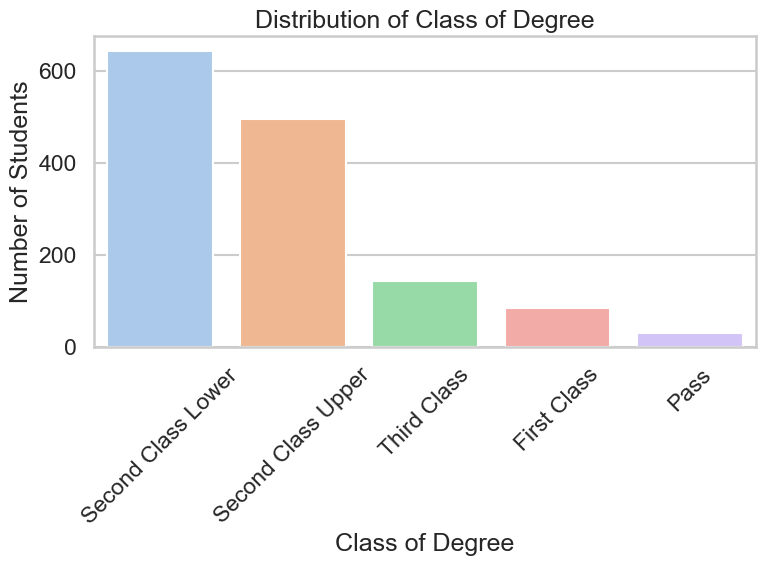

In [92]:
# Set seaborn style and context for a clean visual appearance
sns.set(style='whitegrid', context='talk')

# Create a count plot of students by class of degree
plt.figure(figsize=(8, 6))
sns.countplot(
    data=df,
    x='CLASS_OF_DEGREE',
    order=df['CLASS_OF_DEGREE'].value_counts().index,
    palette='pastel'
)

# Add chart title and axis labels
plt.title('Distribution of Class of Degree')
plt.xlabel('Class of Degree')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

### Visualizing Gender Distribution

This plot shows the gender breakdown among students:

- The bars for **Male** and **Female** are nearly equal in height
- **Females** have a slight edge in count

This balanced gender distribution supports fair comparisons in subsequent gender-based analyses.

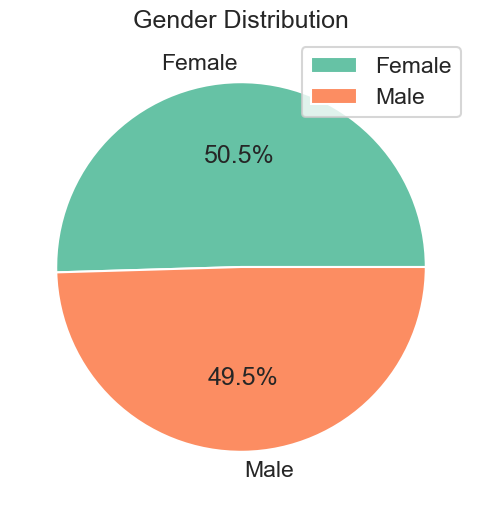

In [111]:
# Ensure mapping and color order match
gender_counts = df['GENDER'].map({'M': 'Male', 'F': 'Female'}).value_counts()

# Match bar chart colors from 'Set2'
gender_color_map = {
    'Male': '#fc8d62',   # second color in Set2
    'Female': '#66c2a5'  # first color in Set2
}

# Create color list based on index order
pie_colors = [gender_color_map[gender] for gender in gender_counts.index]

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=pie_colors)
plt.title('Gender Distribution')
plt.legend(loc='upper right')
plt.show()

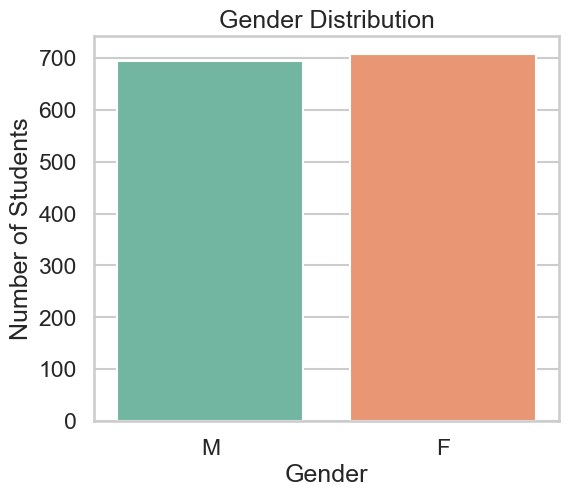

In [94]:
# Create a count plot showing gender distribution
plt.figure(figsize=(6, 5))
sns.countplot(data=df, x='GENDER', palette='Set2')

# Add chart title and labels
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Number of Students')
plt.show()

### Top 10 States of Origin

This bar chart shows the ten states with the highest student representation:

- **Osun**, **Ogun**, and **Oyo** lead significantly, reflecting strong regional enrollment.
- **Kwara** and **Lagos** follow, while other states like **Yobe** and **Ekiti** contribute smaller numbers.

This confirms that the dataset is dominated by students from southwestern Nigeria.

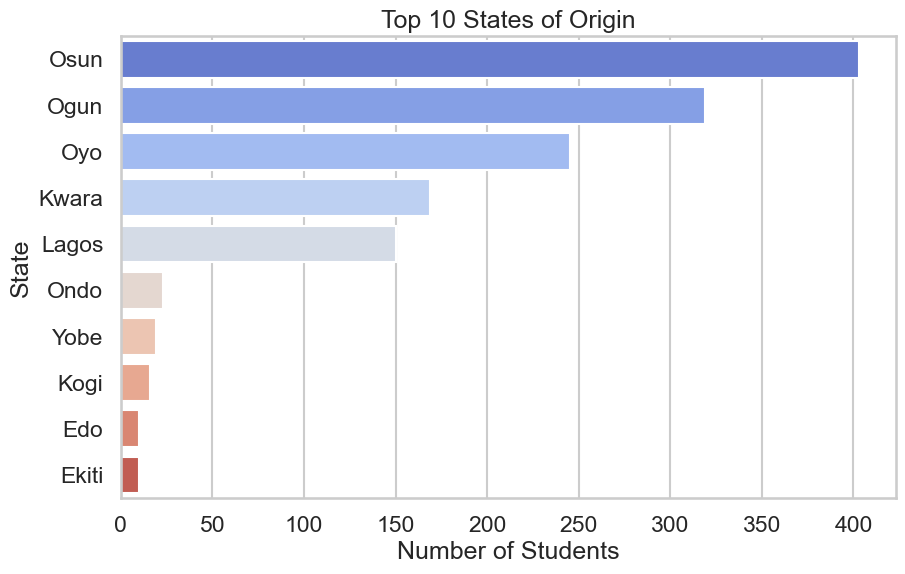

In [95]:
# Get the top 10 states with the most students
top_states = df['STATE_OF_ORIGIN'].value_counts().head(10)

# Create a horizontal bar plot of student counts by state
plt.figure(figsize=(10, 6))
sns.barplot(x=top_states.values, y=top_states.index, palette='coolwarm')

# Add chart title and axis labels
plt.title('Top 10 States of Origin')
plt.xlabel('Number of Students')
plt.ylabel('State')
plt.show()

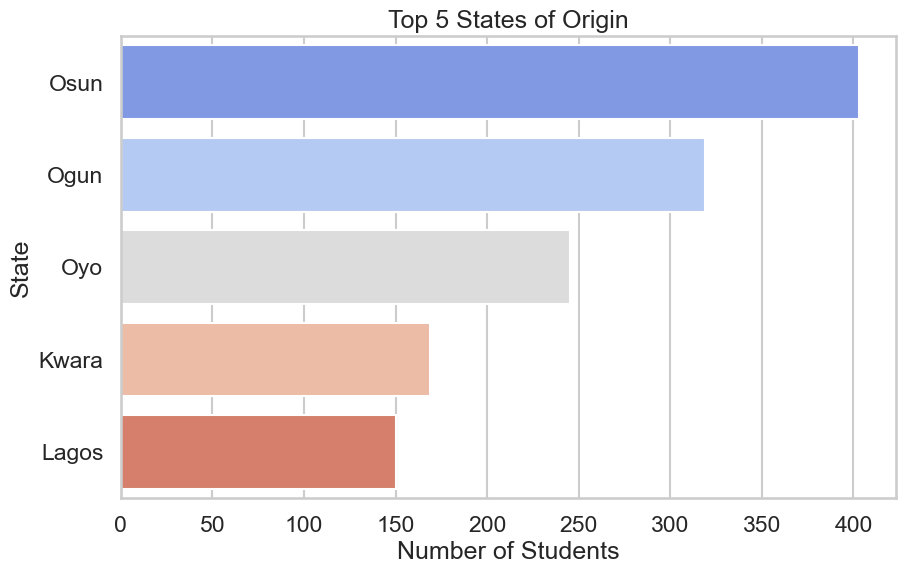

In [112]:
# Get the top 5 states with the most students
top_states = df['STATE_OF_ORIGIN'].value_counts().head(5)

# Create a horizontal bar plot of student counts by state
plt.figure(figsize=(10, 6))
sns.barplot(x=top_states.values, y=top_states.index, palette='coolwarm')

# Add chart title and axis labels
plt.title('Top 5 States of Origin')
plt.xlabel('Number of Students')
plt.ylabel('State')
plt.show()

### Age at Admission Distribution

This histogram shows how students are distributed by their age at the time of admission, with a KDE curve layered on top:

- The distribution is **right-skewed**, with most students admitted between ages **15–20**
- The **mode (peak)** occurs around **age 17–18**
- A sharp drop-off follows age 20, and only a few students were admitted above 30

This confirms that the majority of students begin university at a relatively young age, with rare cases of mature entry.

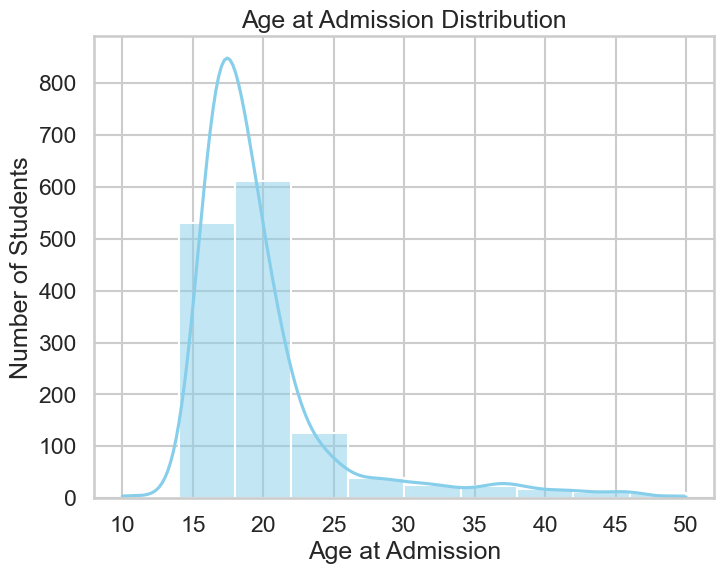

In [96]:
# Plot a histogram with KDE showing the distribution of age at admission
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='AGE_AT_ADMISSION', kde=True, bins=10, color='skyblue')

# Add title and axis labels
plt.title('Age at Admission Distribution')
plt.xlabel('Age at Admission')
plt.ylabel('Number of Students')
plt.show()

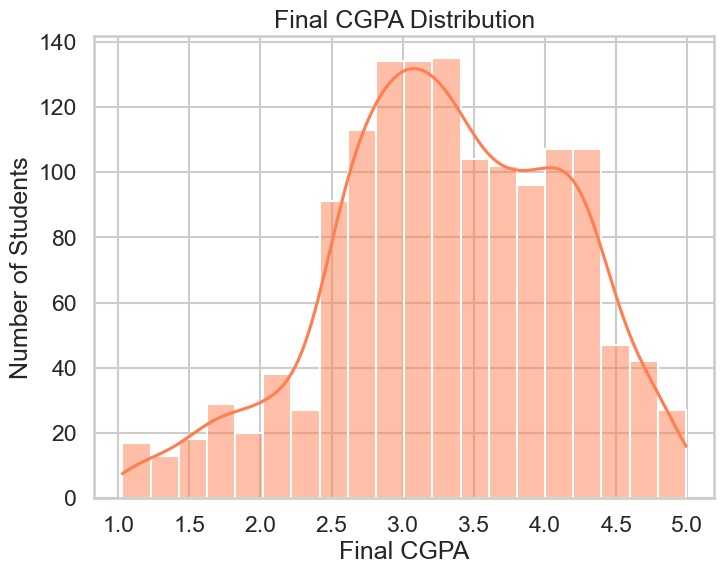

In [97]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='FINAL_CGPA', kde=True, bins=20, color='coral')
plt.title('Final CGPA Distribution')
plt.xlabel('Final CGPA')
plt.ylabel('Number of Students')
plt.show()

In [114]:
df.head(1)

,AGE_AT_ADMISSION,GENDER,STATE_OF_ORIGIN,COURSE_OF_STUDY,FINAL_CGPA,CLASS_OF_DEGREE,AGE_GROUP
0,16.0,M,Oyo,Accounting,4.79,First Class,16-17


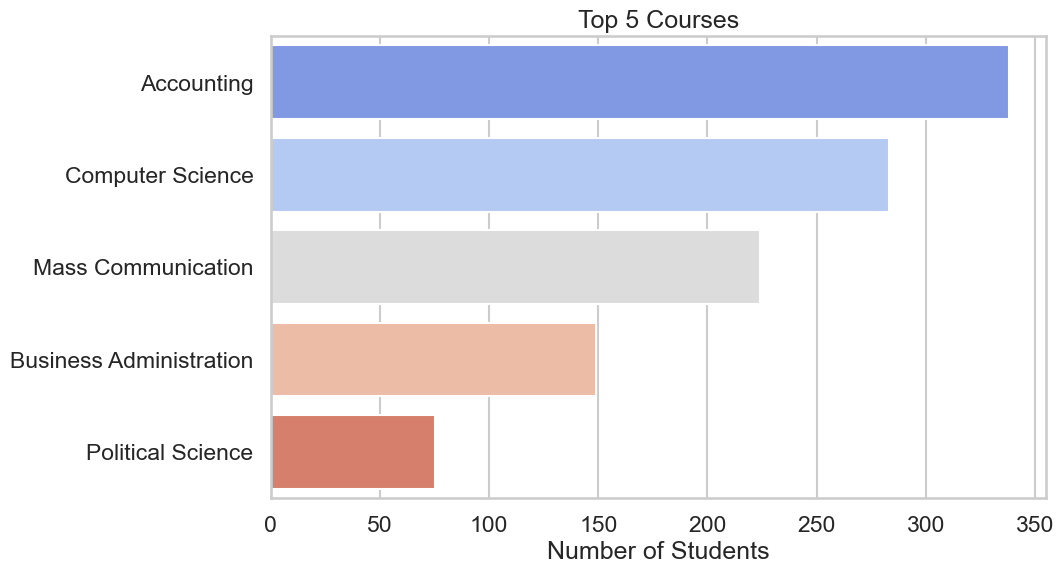

In [118]:
# Get the top 10 states with the most students
top_states = df['COURSE_OF_STUDY'].value_counts().head(5)

# Create a horizontal bar plot of student counts by state
plt.figure(figsize=(10, 6))
sns.barplot(x=top_states.values, y=top_states.index, palette='coolwarm')

# Add chart title and axis labels
plt.title('Top 5 Courses')
plt.xlabel('Number of Students')
plt.ylabel('')
plt.show()

### CGPA Distribution by Class of Degree

This boxplot shows how `FINAL_CGPA` is distributed within each class of degree:

- The CGPA ranges align cleanly with the official class thresholds:
  - **First Class:** 4.5 – 5.0
  - **Second Class Upper:** ~3.5 – 4.49
  - **Second Class Lower:** ~2.5 – 3.49
  - **Third Class:** ~1.5 – 2.49
  - **Pass:** ~1.0 – 1.49

This plot validates the integrity of both the original and estimated CGPA values and confirms that class labels match their numerical CGPA boundaries.

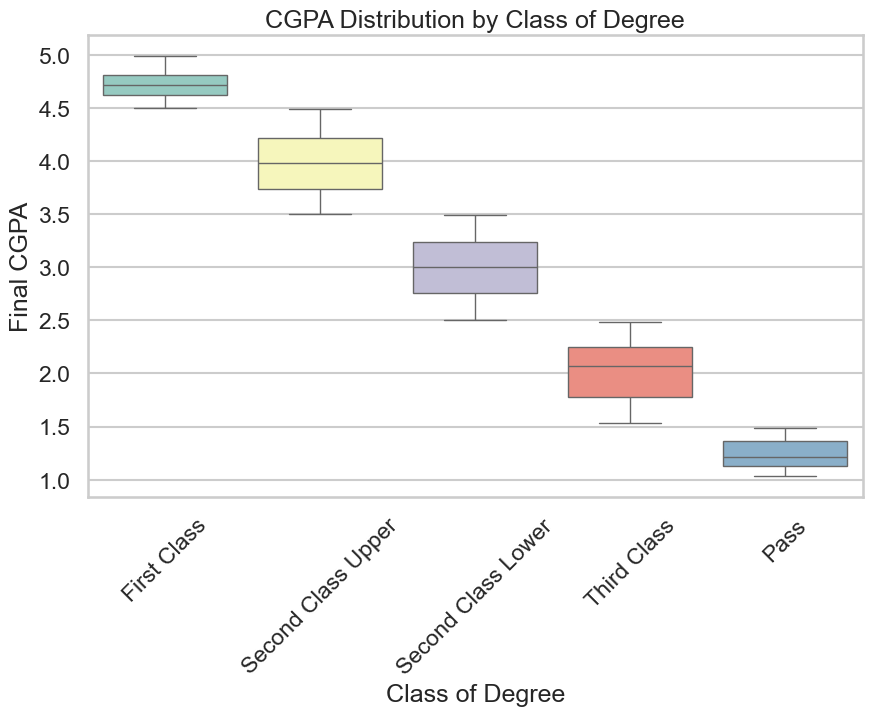

In [98]:
# Create a boxplot to visualize CGPA distribution within each class of degree
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='CLASS_OF_DEGREE', y='FINAL_CGPA', palette='Set3')

# Add chart title and axis labels
plt.title('CGPA Distribution by Class of Degree')
plt.xlabel('Class of Degree')
plt.ylabel('Final CGPA')
plt.xticks(rotation=45)
plt.show()

### CGPA Distribution by Gender

This boxplot compares the distribution of final CGPAs between male and female students:

- **Both genders** show a wide range of CGPA values from just above 1.0 to nearly 5.0
- **Female students**:
  - Have a slightly **higher median CGPA**, just under 3.5
  - Exhibit **mild outliers** below 1.0
- **Male students**:
  - Have a median between 3.0 and 3.5
  - Show a more uniform spread but slightly lower overall performance

This suggests that females may slightly outperform males on average, though further statistical testing is needed to confirm.

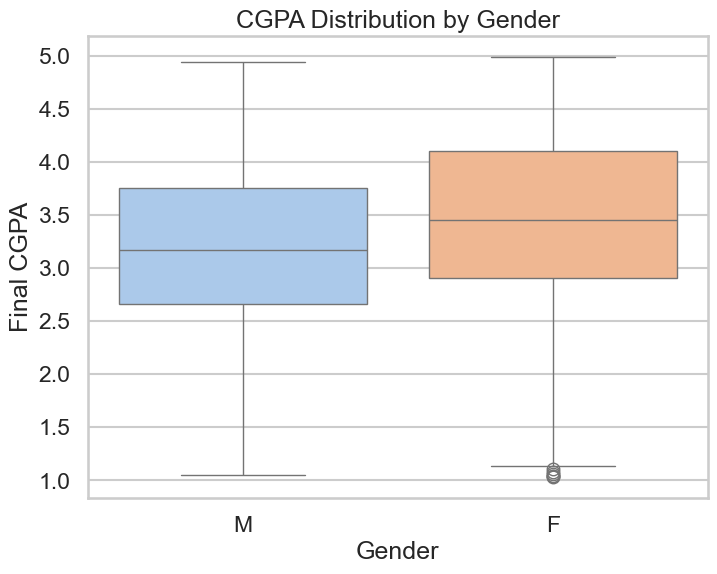

In [99]:
# Create a boxplot showing CGPA distribution by gender
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='GENDER', y='FINAL_CGPA', palette='pastel')

# Add chart title and labels
plt.title('CGPA Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Final CGPA')
plt.show()

### Correlation Heatmap

We visualize the correlation between `AGE_AT_ADMISSION` and `FINAL_CGPA`:

- The correlation coefficient is **0.049**, indicating **virtually no linear relationship**
- The diagonals (1.0) simply represent self-correlation

This tells us that admission age has **no strong predictive power** over CGPA when treated as a linear variable, though other analysis (like group comparisons) may still reveal patterns.

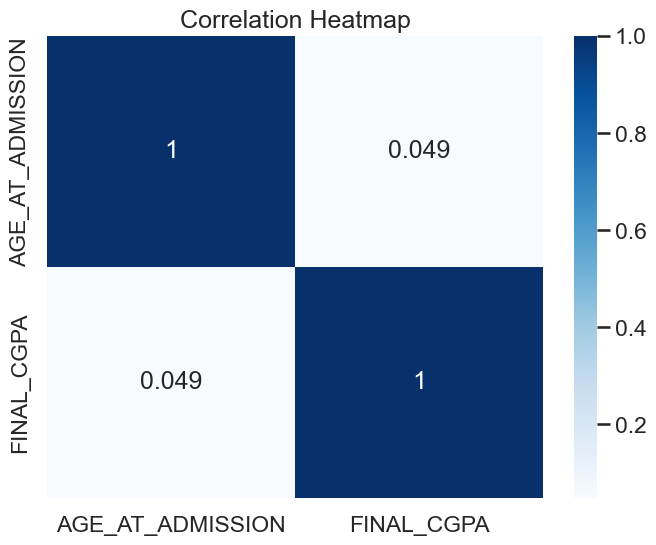

In [100]:
# Create a heatmap to visualize correlation between numerical features
plt.figure(figsize=(8, 6))
sns.heatmap(df[['AGE_AT_ADMISSION', 'FINAL_CGPA']].corr(), annot=True, cmap='Blues')

# Add a title to the heatmap
plt.title('Correlation Heatmap')
plt.show()

### Creating Age Groups

To analyze student performance by age categories, we create a new column `AGE_GROUP` by grouping `AGE_AT_ADMISSION` into:

- **Below 16**
- **16–17**
- **18**
- **19–20**
- **Above 20**

This transformation enables clearer comparisons between admission ages and academic outcomes.

In [101]:
# Define a function to categorize age at admission into discrete groups
def age_group(age):
    if age < 16:
        return 'Below 16'
    elif 16 <= age < 18:
        return '16-17'
    elif age == 18:
        return '18'
    elif 19 <= age <= 20:
        return '19-20'
    else:
        return 'Above 20'

# Apply the function to create a new AGE_GROUP column
df['AGE_GROUP'] = df['AGE_AT_ADMISSION'].apply(age_group)

# Preview the updated dataset with the new column
df.head()

,AGE_AT_ADMISSION,GENDER,STATE_OF_ORIGIN,COURSE_OF_STUDY,FINAL_CGPA,CLASS_OF_DEGREE,AGE_GROUP
0,16.0,M,Oyo,Accounting,4.79,First Class,16-17
1,18.0,F,Oyo,Accounting,4.71,First Class,18
2,17.0,F,Ogun,Accounting,4.07,Second Class Upper,16-17
3,16.0,F,Lagos,Accounting,3.70,Second Class Upper,16-17
4,16.0,F,Kwara,Accounting,4.31,Second Class Upper,16-17


In [102]:
# Export the cleaned dataset covering 2014–2024 graduates to Excel
age_order = ['Below 16', '16-17', '18', '19-20', 'Above 20']
cat_type = CategoricalDtype(categories=age_order, ordered=True)
df['AGE_GROUP'] = df['AGE_GROUP'].astype(cat_type)

df.to_csv('cleaned_dataset/age_group_student_data.csv', index=False)

### Class of Degree Distribution by Age Group

We examine how class of degree is distributed across age groups (as percentages):

| Age Group | First Class | Second Class Upper | Second Class Lower | Third Class | Pass |
|-----------|-------------|--------------------|---------------------|-------------|------|
| **Below 16** | 6%          | 49%                 | 32%                  | 4%          | 9%   |
| **16–17**    | 10%         | 36%                 | 44%                  | 7%          | 3%   |
| **18**       | 6%          | 37%                 | 42%                  | 14%         | 1%   |
| **19–20**    | 4%          | 32%                 | 51%                  | 11%         | 2%   |
| **Above 20** | 3%          | 35%                 | 48%                  | 13%         | 1%   |

 **Key Insights**:
- The **16–17** group has the **highest First Class rate (10%)**.
- **Below 16** surprisingly has **strong Second Class Upper performance (49%)** but also the **highest Pass rate (9%)** — showing performance variability.
- Students **Above 20** and **19–20** have lower First Class rates and slightly higher Third Class rates.
- Performance seems to dip slightly as age increases beyond 18.

This supports the idea that **younger entry ages tend to perform slightly better** academically on average.

In [103]:
# Create a percentage cross-tab of class of degree across age groups
age_class_distribution = pd.crosstab(
    df['AGE_GROUP'],
    df['CLASS_OF_DEGREE'],
    normalize='index'
) * 100

# Round the percentages for cleaner display
age_class_distribution = age_class_distribution.round()
age_class_distribution

CLASS_OF_DEGREE,First Class,Pass,Second Class Lower,Second Class Upper,Third Class
AGE_GROUP,,,,,
Below 16,6.0,9.0,32.0,49.0,4.0
16-17,10.0,3.0,44.0,36.0,7.0
18,6.0,1.0,42.0,37.0,14.0
19-20,4.0,2.0,51.0,32.0,11.0
Above 20,3.0,1.0,48.0,35.0,13.0


### Class of Degree Distribution by Gender

We compare academic performance between male and female students using normalized percentages:

| Gender | First Class | Second Class Upper | Second Class Lower | Third Class | Pass |
|--------|-------------|--------------------|---------------------|-------------|------|
| **Female** | 8%          | 41%                 | 41%                  | 6%          | 4%   |
| **Male**   | 4%          | 30%                 | 51%                  | 15%         | 1%   |

 **Key Insights**:
- **Female students** outperform in the top two categories: more First Class and Second Class Upper results.
- **Male students** dominate the **Second Class Lower** and **Third Class** categories.
- The **Pass rate** is slightly higher for females, though low overall.

This supports the earlier boxplot finding: **females tend to perform slightly better academically**.

In [104]:
# Create a percentage cross-tab of class of degree across gender
gender_class_distribution = pd.crosstab(
    df['GENDER'],
    df['CLASS_OF_DEGREE'],
    normalize='index'
) * 100

# Round for cleaner formatting
gender_class_distribution = gender_class_distribution.round()
gender_class_distribution

CLASS_OF_DEGREE,First Class,Pass,Second Class Lower,Second Class Upper,Third Class
GENDER,,,,,
F,8.0,4.0,41.0,41.0,6.0
M,4.0,1.0,51.0,30.0,15.0


### CGPA Summary Statistics by Age Group and Gender

We compute the **mean** and **median** CGPA for each age group and gender:

#### CGPA by Age Group

| Age Group   | Mean CGPA | Median CGPA |
|-------------|-----------|-------------|
| Below 16    | 3.39      | 3.67        |
| 16–17       | 3.39      | 3.40        |
| 18          | 3.29      | 3.26        |
| 19–20       | 3.26      | 3.25        |
| Above 20    | 3.25      | 3.27        |

**Observation**: The younger the student, has slightly higher average CGPA — especially for **Below 16**, which shows the highest median.

#### CGPA by Gender

| Gender | Mean CGPA | Median CGPA |
|--------|-----------|-------------|
| Female | 3.43      | 3.45        |
| Male   | 3.20      | 3.17        |

**Observation**: Female students consistently outperform male students in both average and median CGPA, confirming trends seen in previous visualizations.

In [105]:
# Group by AGE_GROUP and calculate mean and median CGPA
cgpa_stats_age = df.groupby('AGE_GROUP')['FINAL_CGPA'].agg(['mean', 'median']).round(2)

# Group by GENDER and calculate mean and median CGPA
cgpa_stats_gender = df.groupby('GENDER')['FINAL_CGPA'].agg(['mean', 'median']).round(2)

# Display the results
print("CGPA stats by Age Group:\n", cgpa_stats_age)
print("\nCGPA stats by Gender:\n", cgpa_stats_gender)

CGPA stats by Age Group:
            mean  median
AGE_GROUP              
Below 16   3.39    3.67
16-17      3.39    3.40
18         3.29    3.26
19-20      3.26    3.25
Above 20   3.25    3.27

CGPA stats by Gender:
         mean  median
GENDER              
F       3.43    3.45
M       3.20    3.17


### Stacked Bar Charts: Class of Degree by Age Group and Gender

We visualize how degree classifications vary across age groups and gender using stacked bar charts.

#### Class of Degree by Age Group

- **First Class**: Highest in **16–17**, followed by **18** and **Below 16**
- **Second Class Upper**: Most dominant in **Below 16**, **18**, and **16–17**
- **Second Class Lower**: Rises with age — peaking in **19–20** and **Above 20**
- **Third Class**: Peaks in **18**, followed by older age groups
- **Pass**: Surprisingly highest in **Below 16**, followed by **16–17**

#### Class of Degree by Gender

- **Females**:
  - Higher proportions in **First Class** and **Second Class Upper**
  - Lower representation in **Third Class**

- **Males**:
  - Stronger presence in **Second Class Lower** and **Third Class**
  - Smaller share of **First Class**

These visuals support earlier numeric and boxplot findings — especially the impact of **age and gender on academic performance**.

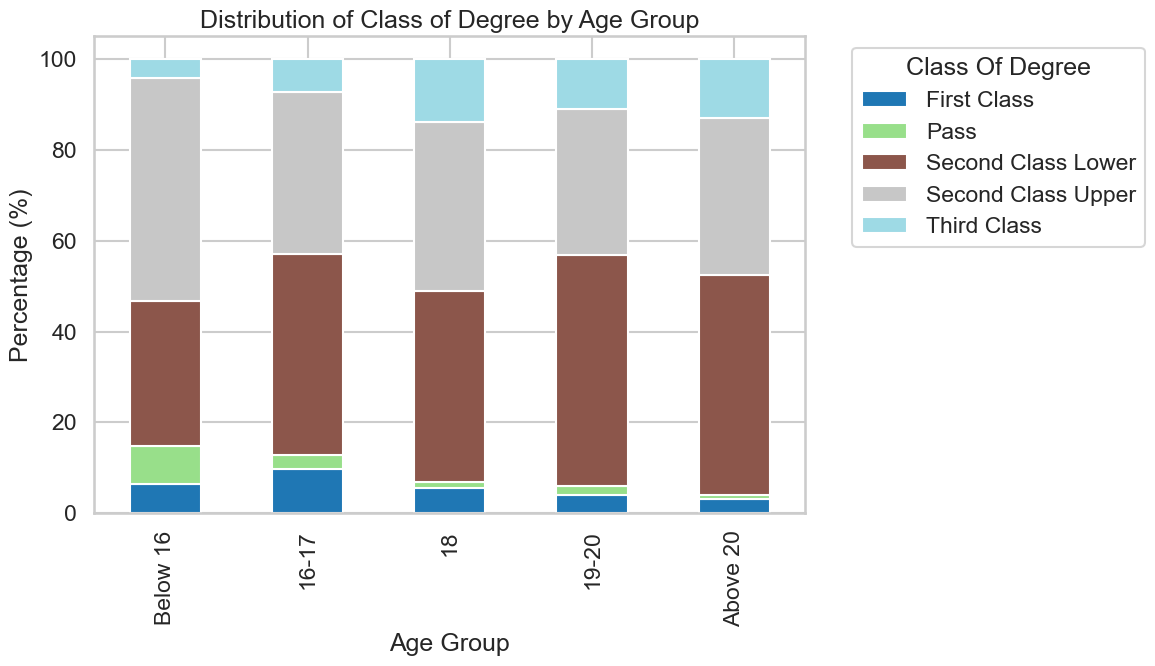

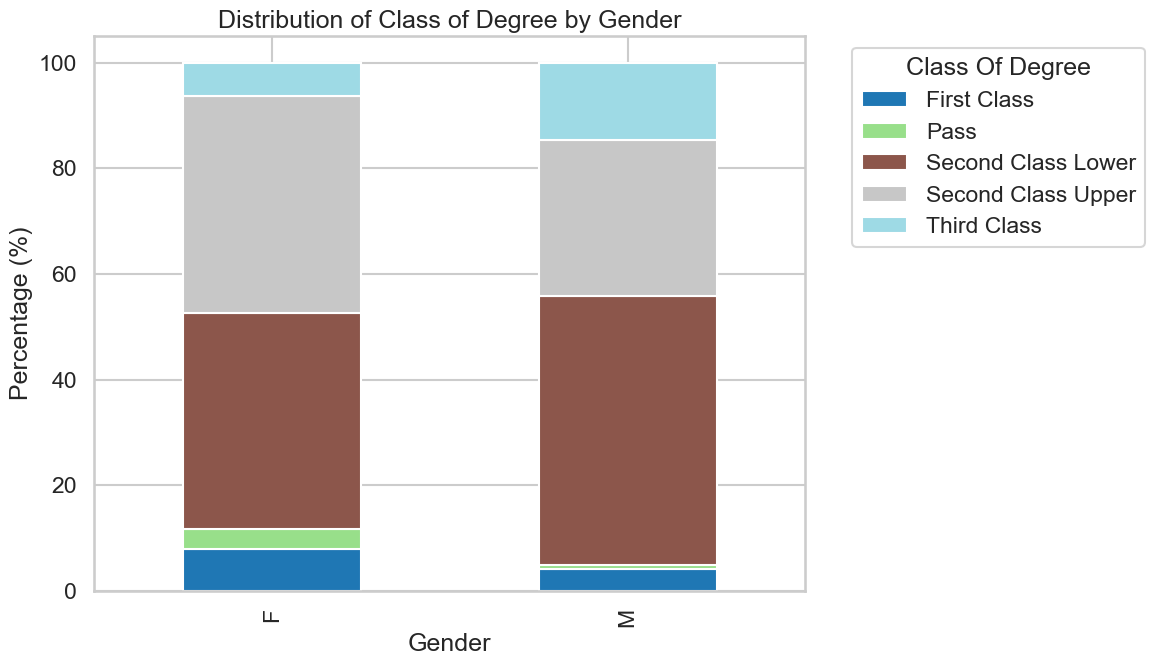

In [106]:
# Set the style for all seaborn plots
sns.set(style='whitegrid', context='talk')

# Helper function to create stacked bar charts
def plot_stacked_bar(df, group_col, target_col, title):
    # Create normalized cross-tab (percentages)
    ct = pd.crosstab(df[group_col], df[target_col], normalize='index') * 100

    # Plot as a stacked bar chart
    ct.plot(kind='bar', stacked=True, figsize=(12,7), colormap='tab20')

    # Add labels and legend
    plt.title(title)
    plt.ylabel('Percentage (%)')
    plt.xlabel(group_col.replace('_', ' ').title())
    plt.legend(
        title=target_col.replace('_', ' ').title(),
        bbox_to_anchor=(1.05, 1), loc='upper left'
    )
    plt.tight_layout()
    plt.show()

# Plot Class of Degree distribution by Age Group
plot_stacked_bar(df, 'AGE_GROUP', 'CLASS_OF_DEGREE', 'Distribution of Class of Degree by Age Group')

# Plot Class of Degree distribution by Gender
plot_stacked_bar(df, 'GENDER', 'CLASS_OF_DEGREE', 'Distribution of Class of Degree by Gender')

### Boxplots: CGPA Distribution by Age Group and Gender

#### By Age Group

These boxplots show the CGPA distribution across age groups:

- **16–17**: Consistently strong CGPA spread — median above 3.2, top near 5.0
- **18**: Similar range but slightly lower median
- **19–20** & **Above 20**: Medians dip slightly; occasional outliers appear
- **Below 16**: Broad range, median highest (~3.6), but some extreme low outliers (1.0)

This confirms that **younger students tend to perform slightly better** — particularly in the `Below 16` and `16–17` brackets.

#### By Gender

We contrast CGPA distribution between male and female students:

- **Females**: Slightly **higher median (~3.45)**, tighter spread near the top, and a few low outliers
- **Males**: **Lower median (~3.2)** and more students clustered in the lower range

These plots back earlier findings: **females tend to achieve higher CGPAs**, and age plays a notable role in performance.

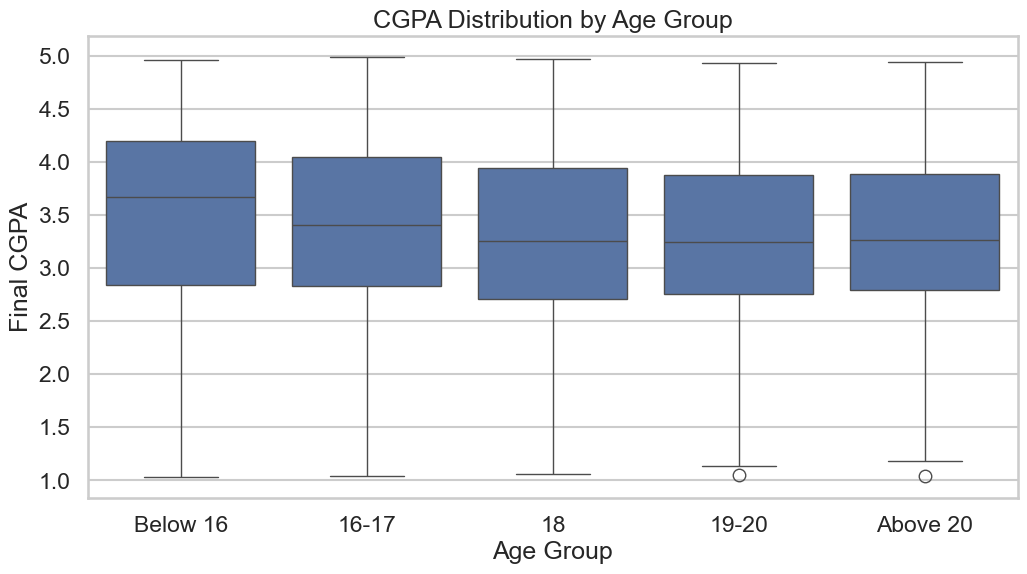

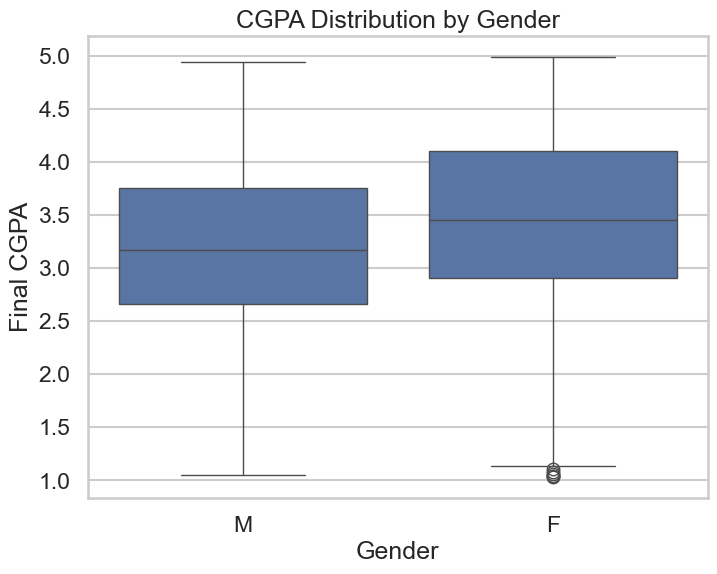

In [107]:
# Boxplot of CGPA by Age Group
plt.figure(figsize=(12,6))
sns.boxplot(x='AGE_GROUP', y='FINAL_CGPA', data=df)
plt.title('CGPA Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Final CGPA')
plt.show()

# Boxplot of CGPA by Gender
plt.figure(figsize=(8,6))
sns.boxplot(x='GENDER', y='FINAL_CGPA', data=df)
plt.title('CGPA Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Final CGPA')
plt.show()

### T-Test: Comparing CGPA by Gender

We perform an independent two-sample t-test to compare the mean CGPA of male and female students.

**Hypotheses**:
- **Null (H₀)**: There is no significant difference in CGPA between genders.
- **Alternative (H₁)**: There is a significant difference in CGPA between genders.

**Results**:
- **T-statistic** = -5.250
- **P-value** = 0.0000

Since the p-value is far below 0.05, we **reject the null hypothesis**.  
 **Conclusion**: There is a **statistically significant difference** in CGPA between male and female students — with **females performing better on average**.

In [108]:
from scipy.stats import ttest_ind

# Separate CGPA values by gender
cgpa_male = df.loc[df['GENDER'] == 'M', 'FINAL_CGPA'].dropna()
cgpa_female = df.loc[df['GENDER'] == 'F', 'FINAL_CGPA'].dropna()

# Perform independent t-test (Welch's t-test due to unequal variances)
t_stat, p_value = ttest_ind(cgpa_male, cgpa_female, equal_var=False)

# Output test results
print(f"T-test Results:\nT-statistic = {t_stat:.3f}, p-value = {p_value:.4f}")

T-test Results:
T-statistic = -5.250, p-value = 0.0000


### ANOVA: Comparing CGPA Across Age Groups

We perform a one-way ANOVA test to determine if CGPA differs significantly between age groups.

**Hypotheses**:
- **Null (H₀)**: All age groups have equal mean CGPAs.
- **Alternative (H₁)**: At least one age group has a significantly different mean CGPA.

**Results**:
- **F-statistic** = 1.902
- **P-value** = 0.1077

Since the p-value is greater than 0.05, we **fail to reject the null hypothesis**.  
 **Conclusion**: There is **no statistically significant difference** in CGPA across age groups, even though minor trends were visible in the descriptive stats and visualizations.

In [109]:
from scipy.stats import f_oneway

# Collect CGPA values grouped by each AGE_GROUP into a list of arrays
groups = [df.loc[df['AGE_GROUP'] == age_grp, 'FINAL_CGPA'].dropna() for age_grp in df['AGE_GROUP'].unique()]

# Perform one-way ANOVA test to compare means across age groups
f_stat, p_value = f_oneway(*groups)

# Output test results
print(f"ANOVA Results:\nF-statistic = {f_stat:.3f}, p-value = {p_value:.4f}")

ANOVA Results:
F-statistic = 1.902, p-value = 0.1077


### Faceted Boxplots: CGPA by Age Group and Gender

This plot displays CGPA distributions across age groups, **separately for males and females**:

#### Male Students
- Most age groups show a **median CGPA between 3.1 and 3.4**
- **Outliers** are present in **19–20** and **Below 16**, particularly at the low end (~1.0)
- **16–17** and **Above 20** show the strongest central performance

#### Female Students
- **Higher medians overall** than males — most fall between **3.4 and 3.6**
- **Outliers** exist at the lower edge (~1.0), but the main body of CGPAs is higher
- **Below 16** and **16–17** age groups stand out for their **strong academic performance**
- Across nearly all age groups, females show **tighter spreads and higher CGPA medians**

 **Key Insight**: While CGPA doesn’t differ significantly by age alone (per ANOVA), it **varies meaningfully when gender is considered alongside age**, reaffirming trends seen earlier in t-tests and grouped boxplots.

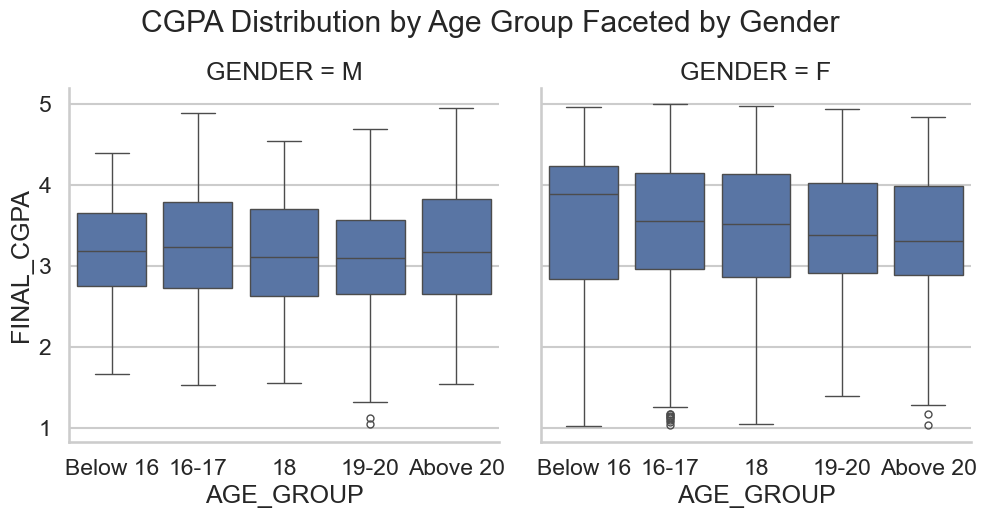

In [110]:
# Create faceted boxplots showing CGPA distribution by age group, split by gender
sns.catplot(
    data=df,
    x='AGE_GROUP',
    y='FINAL_CGPA',
    col='GENDER',
    kind='box',
    height=5,
    aspect=1
)

# Add a centered overall title
plt.suptitle('CGPA Distribution by Age Group Faceted by Gender', y=1.05)
plt.show()

## Conclusion

##  Summary of Findings: Admission Age, Gender & Academic Performance (2014–2024)

This project analyzed the academic performance of students admitted into higher institutions between **2014 and 2024**, focusing on how performance varies by **age at admission**, **gender**, and **course of study**.

### 1.  Dataset Overview
- **Total records**: 1,401 students
- Key variables: `AGE_AT_ADMISSION`, `GENDER`, `STATE_OF_ORIGIN`, `COURSE_OF_STUDY`, `FINAL_CGPA`, and `CLASS_OF_DEGREE`
- Dataset cleaned, normalized, and enhanced with:
  - `AGE_GROUP` categories
  - Imputed and validated `FINAL_CGPA` values
  - Standardized course and class names

---

### 2.  Demographic Insights
- **Gender**: Almost evenly split — 707 females, 694 males
- **Top States**: Osun, Ogun, and Oyo dominate, reflecting strong southwestern representation
- **Most Popular Courses**: Accounting, Computer Science, and Mass Communication

---

### 3.  Academic Performance
- **Most common class**: Second Class Lower (46%)
- **CGPA Distribution**:
  - Mean: 3.31
  - Range: 1.03 to 4.99
- **Younger students** (especially Below 16 and 16–17) had higher medians and more First Class degrees
- **Female students** consistently outperformed males in CGPA and degree class distribution

---

### 4.  Statistical Testing
- **T-test (Gender)**:
  - **Result**: p-value = 0.0000 → Statistically significant
  - **Conclusion**: Female students have significantly higher CGPAs than males
- **ANOVA (Age Group)**:
  - **Result**: p-value = 0.1077 → Not statistically significant
  - **Conclusion**: No strong evidence of CGPA difference across age groups when considered alone

---

### 5.  Key Takeaways
- **Gender matters**: Female students tend to perform better academically
- **Age effects are nuanced**: Younger age groups (especially 16–17) perform slightly better, though not always significantly
- **Course performance** and **state representation** provide useful context for institutional decision-making

This analysis offers a strong foundation for understanding how demographic factors relate to student success — and sets the stage for deeper predictive modeling or policy recommendation.